# Оценка стоимости  и типа трансмиссии по данным продаж автомобилей на вторичном рынке Молдавии

# Часть 3. Готовые алгоритмы

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns; 
sns.set()

try:
    import plotly
except:
    !pip install plotly
finally:
    import plotly.express as px

%matplotlib inline

import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [15]:
df_se = pd.read_csv("car_se.csv")
df_se = df_se.drop(columns = ['Unnamed: 0'])
df_se.info()

df = df_se 

df_num = pd.read_csv("car_num.csv")
df_num = df_num.drop(columns = ['Unnamed: 0'])
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32074 entries, 0 to 32073
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32074 non-null  int64  
 1   Model                 32074 non-null  int64  
 2   Year                  32074 non-null  int64  
 3   Style                 32074 non-null  int64  
 4   Distance              32074 non-null  float64
 5   Engine_capacity(cm3)  32074 non-null  float64
 6   Fuel_type             32074 non-null  int64  
 7   Transmission          32074 non-null  int64  
 8   Price(euro)           32074 non-null  float64
 9   km_year               32074 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 2.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32074 entries, 0 to 32073
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year          

# Обучение без учителя

## PCA

In [16]:
scaler    = MinMaxScaler()
X_cluster = scaler.fit_transform(df_se)

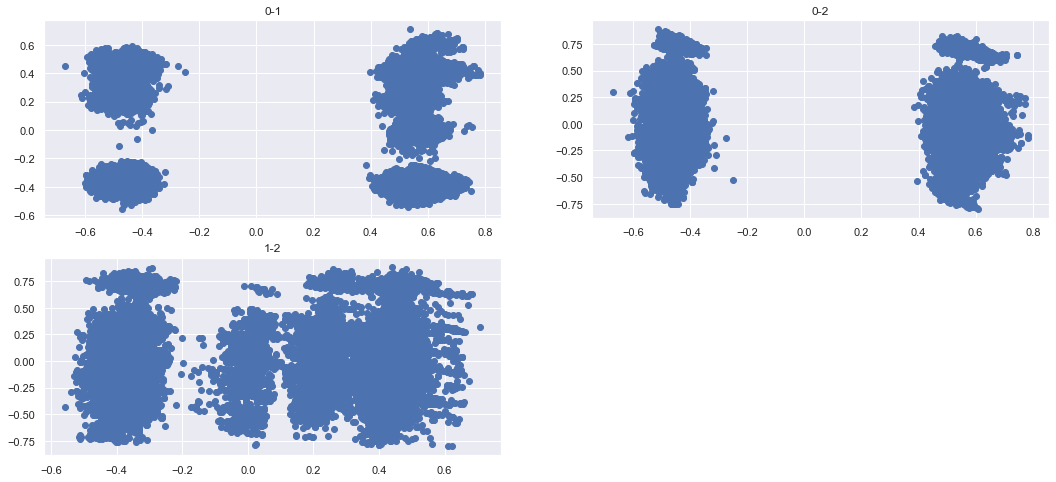

In [17]:
from sklearn.decomposition import PCA
X_new  = PCA(n_components=3).fit_transform(X_cluster)
X_new.shape

plt.figure(figsize=(18,8))
plt.subplot(221); plt.scatter(X_new[:,0],X_new[:,1]); plt.title("0-1")
plt.subplot(222); plt.scatter(X_new[:,0],X_new[:,2]); plt.title("0-2")
plt.subplot(223); plt.scatter(X_new[:,1],X_new[:,2]); plt.title("1-2")
plt.show();

### Clustering

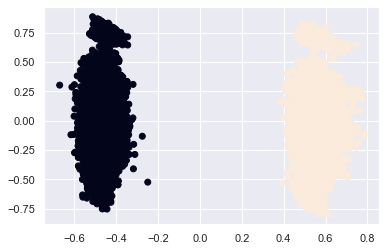

In [18]:
from sklearn import cluster 

X_new  = PCA(n_components=5).fit_transform(X_cluster)

kmeans = cluster.KMeans(n_clusters=2, n_init=100)
kmeans.fit(X_new)
labels = kmeans.predict(X_new)

plt.scatter(X_new[:,0], X_new[:,2],c =labels );   

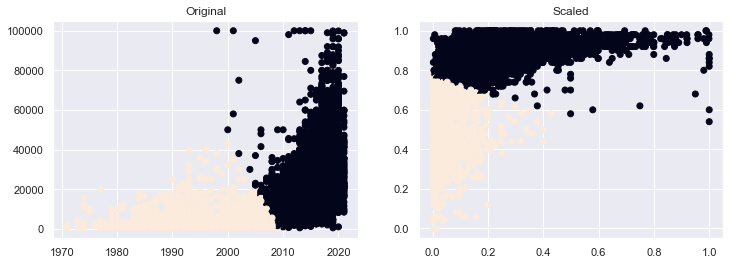

In [19]:
df_test = df_se[["Price(euro)","Year"]]

X_cluster = scaler.fit_transform(df_test)

kmeans = cluster.KMeans(n_clusters=2, n_init=100)
kmeans.fit(X_cluster)
labels = kmeans.predict(X_cluster)

plt.figure(figsize=(12,4))
plt.subplot(121);plt.scatter(df["Year"],df["Price(euro)"],  c = labels); plt.title('Original')
plt.subplot(122);plt.scatter(X_cluster[:,0],X_cluster[:,1],  c = labels); plt.title('Scaled')
plt.show();

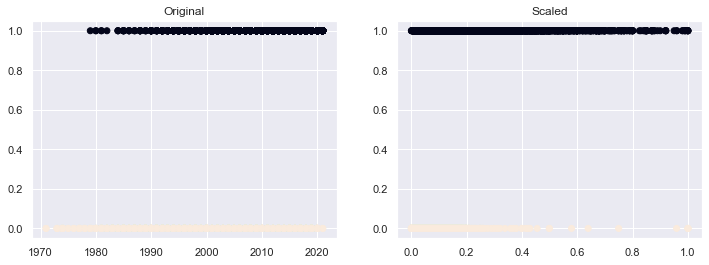

In [20]:
df_test = df_se[["Price(euro)","Transmission"]]

X_cluster = scaler.fit_transform(df_test)

kmeans = cluster.KMeans(n_clusters=2, n_init=100)
kmeans.fit(X_cluster)
labels = kmeans.predict(X_cluster)

plt.figure(figsize=(12,4))
plt.subplot(121);plt.scatter(df["Year"],df["Transmission"],  c = labels); plt.title('Original')
plt.subplot(122);plt.scatter(X_cluster[:,0],X_cluster[:,1],  c = labels); plt.title('Scaled')
plt.show();

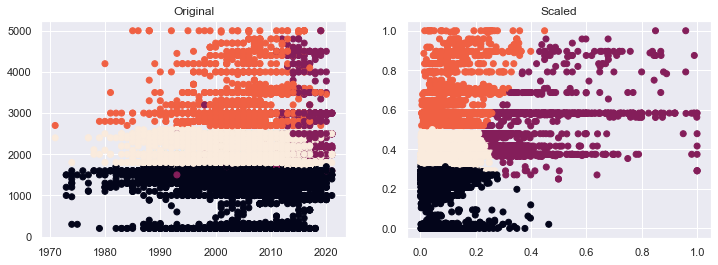

In [21]:
df_test = df_se[["Price(euro)","Engine_capacity(cm3)"]]

X_cluster = scaler.fit_transform(df_test)

kmeans = cluster.KMeans(n_clusters=4, n_init=100)
kmeans.fit(X_cluster)
labels = kmeans.predict(X_cluster)

plt.figure(figsize=(12,4))
plt.subplot(121);plt.scatter(df["Year"],df["Engine_capacity(cm3)"],  c = labels); plt.title('Original')
plt.subplot(122);plt.scatter(X_cluster[:,0],X_cluster[:,1],  c = labels); plt.title('Scaled')
plt.show(); 

# Обучение с учителем

## Prediction problem

<AxesSubplot:>

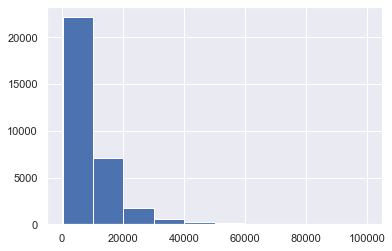

In [22]:
y = df_se["Price(euro)"]
X = df_se.drop(["Price(euro)"], axis = 1)
y.hist()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
pd.DataFrame(X_train).tail()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,km_year
4003,17,54,2010,4,111000.0,1388.0,4,1,9250.000000
21166,25,40,2008,4,213258.0,1600.0,0,0,15232.714286
7462,53,88,1988,10,300000.0,1800.0,4,0,8823.529412
15588,53,37,2014,6,165000.0,1600.0,0,0,20625.000000
13179,50,24,2016,11,165000.0,1800.0,2,1,27500.000000


In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pd.DataFrame(X_train).tail()

,0,1,2,3,4,5,6,7,8
22446,0.309091,0.406015,0.78,0.363636,0.221844,0.247500,0.8,1.0,0.183367
22447,0.454545,0.300752,0.74,0.363636,0.426401,0.291667,0.0,0.0,0.303261
22448,0.963636,0.661654,0.34,0.909091,0.599920,0.333333,0.8,0.0,0.174820
22449,0.963636,0.278195,0.86,0.545455,0.329866,0.291667,0.0,0.0,0.411323
22450,0.909091,0.180451,0.90,1.000000,0.329866,0.333333,0.4,1.0,0.549098


In [25]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100, max_depth=50, random_state=42)
rfr.fit(X_train, y_train)

train_predictions = rfr.predict(X_train)
train_score = rfr.score(X_train,y_train)

test_predictions = rfr.predict(X_test)
test_score = rfr.score(X_test,y_test)

print(test_score,train_score)

0.8247511455439858 0.9759029784697839


In [26]:
print(test_predictions[:5])
print(y_test.values[:5])

[19512.38666667  2472.39       16296.12        2040.48
 51524.24      ]
[11000.  3350. 16499.  1600. 55000.]


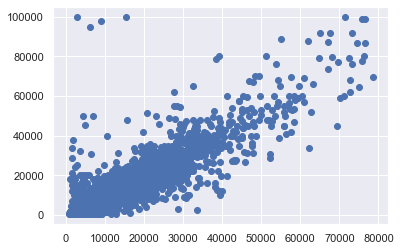

In [27]:
plt.scatter(test_predictions,y_test)

In [28]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(n_estimators=30, random_state=42)
etr.fit(X_train, y_train)

train_predictions = etr.predict(X_train)
train_score = etr.score(X_train,y_train)

test_predictions = etr.predict(X_test)
test_score = etr.score(X_test,y_test)

print(test_score,train_score)

0.8202831647830562 0.999217479058668


In [29]:
from sklearn.neighbors import KNeighborsRegressor

knnr = KNeighborsRegressor(n_neighbors=12)
knnr.fit(X_train, y_train)

train_predictions = knnr.predict(X_train)
train_score = knnr.score(X_train,y_train)

test_predictions = knnr.predict(X_test)
test_score = knnr.score(X_test,y_test)

print(test_score,train_score)

0.7471371635201884 0.7895390236246886


In [30]:
from sklearn.ensemble import AdaBoostRegressor

abr =  AdaBoostRegressor(n_estimators=100, learning_rate=0.01,random_state=42) 
abr.fit(X_train, y_train)

train_predictions = abr.predict(X_train)
train_score = abr.score(X_train,y_train)

test_predictions = abr.predict(X_test)
test_score = abr.score(X_test,y_test)

print(test_score,train_score)

0.6412853489986456 0.6655569463491731


### метод xgboost и важность признаков

0.8343858675810534 0.9455495059905027


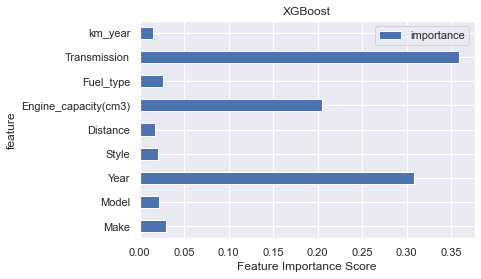

In [31]:
import xgboost as xg

scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

features = X.columns

model = xg.XGBRegressor(random_state = 42)
model.fit(X_train,y_train)

print(model.score(X_test,y_test), model.score(X_train,y_train))

feat_imp = pd.DataFrame({'importance':model.feature_importances_}) 

feat_imp['feature'] = features

feat_imp = feat_imp.set_index('feature', drop=True)

feat_imp.plot.barh(title="XGBoost")

plt.xlabel('Feature Importance Score')

plt.show()

### Вопрос: 
<b>Назовите три самых важных фактора для установки цены? 
   

### Линейные методы регрессии

In [33]:
df_ohe = pd.read_csv("car_ohe.csv")
df_ohe = df_ohe.drop(columns = ['Unnamed: 0'])
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32074 entries, 0 to 32073
Columns: 214 entries, Year to Fuel_type_Plug-in Hybrid
dtypes: float64(4), int64(210)
memory usage: 52.4 MB


In [34]:
y_ohe = df_ohe["Price(euro)"]
X_ohe = df_ohe.drop(["Price(euro)"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y_ohe, test_size=0.3, random_state=42)
pd.DataFrame(X_train).tail()

,Year,Distance,Engine_capacity(cm3),Transmission,km_year,Make_Acura,Make_Alfa Romeo,Make_Alta marca,Make_Audi,Make_BMW,...,Style_Roadster,Style_SUV,Style_Sedan,Style_Universal,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid
29802,2003,240000.0,1896.0,1,12631.578947,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
5390,2008,233000.0,2500.0,0,16642.857143,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
860,2006,286223.0,1800.0,0,17888.937500,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
15795,2006,291000.0,2000.0,0,18187.500000,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23654,1983,290000.0,200.0,0,7435.897436,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [35]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.2, random_state=42)
reg.fit(X_train, y_train)

train_predictions = reg.predict(X_train)
train_score = reg.score(X_train,y_train)

test_predictions = reg.predict(X_test)
test_score = reg.score(X_test,y_test)

print(test_score,train_score)

0.6291802970114533 0.6376190894056215


In [36]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=.1, normalize=False, random_state=42) 
reg.fit(X_train, y_train)

train_predictions = reg.predict(X_train)
train_score = reg.score(X_train,y_train)

test_predictions = reg.predict(X_test)
test_score = reg.score(X_test,y_test)

print(test_score,train_score)

0.6291256861797634 0.6376061807406161


c:\users\ronkin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 340982755349.28064, tolerance: 197303252.32483813
  positive)


### Вопрос: 
<b>Назовите самый высоко-точный регрессор? 
    

## Classification

first class: 14679 zero class: 17395


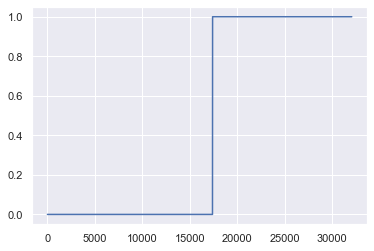

In [37]:
X = df_se.drop(["Transmission"],axis = 1)
y = df_se["Transmission"].values 
plt.plot(np.sort(y.copy()))
print('first class:', np.count_nonzero(y), 'zero class:', y.size - np.count_nonzero(y))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pd.DataFrame(X_train).tail()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Price(euro),km_year
29802,53,88,2003,10,240000.0,1896.0,0,4800.0,12631.578947
5390,21,101,2008,6,233000.0,2500.0,0,7899.0,16642.857143
860,32,31,2006,10,286223.0,1800.0,3,5999.0,17888.937500
15795,44,101,2006,6,291000.0,2000.0,3,4850.0,18187.500000
23654,32,101,1983,10,290000.0,200.0,4,1000.0,7435.897436


In [39]:
scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test) 
pd.DataFrame(X_train).tail()

,0,1,2,3,4,5,6,7,8
22446,0.963636,0.661654,0.64,0.909091,0.479896,0.353333,0.0,0.046092,0.251134
22447,0.381818,0.759398,0.74,0.545455,0.465893,0.479167,0.0,0.077144,0.331520
22448,0.581818,0.233083,0.70,0.909091,0.572360,0.333333,0.6,0.058106,0.356492
22449,0.800000,0.759398,0.70,0.545455,0.581916,0.375000,0.6,0.046593,0.362475
22450,0.581818,0.759398,0.24,0.909091,0.579916,0.000000,0.8,0.008016,0.147012


In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

train_predictions = rf.predict(X_train)
train_score = rf.score(X_train,y_train)

test_predictions = rf.predict(X_test)
test_score = rf.score(X_test,y_test)

print(test_score,train_score)


0.8665696768159618 0.8914079551022226


In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_test_pred = rf.predict(X_test)
print('Accuracy score :', accuracy_score(y_test, y_test_pred),'\n\n\n')
print(classification_report(y_test, y_test_pred))

Accuracy score : 0.8665696768159618 



              precision    recall  f1-score   support

           0       0.85      0.92      0.88      5253
           1       0.89      0.80      0.85      4370

    accuracy                           0.87      9623
   macro avg       0.87      0.86      0.86      9623
weighted avg       0.87      0.87      0.87      9623



In [42]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter = 1e3,C=0.1,random_state=42)
clf.fit(X_train, y_train)

train_predictions = clf.predict(X_train)
train_score = clf.score(X_train,y_train)

test_predictions = clf.predict(X_test)
test_score = clf.score(X_test,y_test)

print(test_score,train_score)
print(classification_report(y_test, test_predictions))

0.8236516678790398 0.8119014743218564
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      5253
           1       0.84      0.75      0.79      4370

    accuracy                           0.82      9623
   macro avg       0.83      0.82      0.82      9623
weighted avg       0.83      0.82      0.82      9623



In [43]:
from sklearn.model_selection import GridSearchCV

rf     = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
params ={'max_depth':[5,10,20,50,100,1e3]}

grid   = GridSearchCV(
             estimator=rf, 
             param_grid=params, 
             scoring = 'accuracy',
             n_jobs = 10, 
             cv = 3 
            )

grid.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=10, random_state=42),
             n_jobs=10, param_grid={'max_depth': [5, 10, 20, 50, 100, 1000.0]},
             scoring='accuracy')

In [44]:
from sklearn.metrics import accuracy_score

y_pred_test = grid.predict(X_test)
y_pred_train = grid.predict(X_train)
print('Best parameter: ',grid.best_params_)  
print('Best accuracy: ', accuracy_score(y_test,y_pred_test), accuracy_score(y_train,y_pred_train))
print(classification_report(y_test, test_predictions))

Best parameter:  {'max_depth': 20}
Best accuracy:  0.878624129689286 0.9986637566255401
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      5253
           1       0.84      0.75      0.79      4370

    accuracy                           0.82      9623
   macro avg       0.83      0.82      0.82      9623
weighted avg       0.83      0.82      0.82      9623



[14:12:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ronkin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


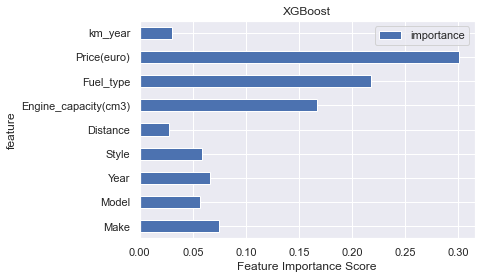

In [45]:
import xgboost as xgb

scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

features = X.columns

model = xgb.XGBClassifier(random_state = 42)
model.fit(X_train,y_train)



feat_imp = pd.DataFrame({'importance':model.feature_importances_}) 

feat_imp['feature'] = features

feat_imp = feat_imp.set_index('feature', drop=True)

feat_imp.plot.barh(title="XGBoost")

plt.xlabel('Feature Importance Score')

plt.show()

### Вопрос: 
<b>Назовите наилучший показатель по глубине ? 
    

### Вопрос: 
<b>Назовите наименее переобученный классификатор ? 
    

### Вопрос: 
<b>Назовите фактор, который неименее всего виляет на определение трансмиссии? 
    